# JEU DE DONNEES CREDIT RISK

## I-EXPLORATION DES DONNEES

In [ ]:
#importation des librairies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#chargement du dataset
dataset='dataset1.csv'
df = pd.read_csv(dataset)

In [ ]:

#affichage des 5 premieres lignes du dataset
df.head(5)

person_age  person_income  person_emp_length  loan_amnt  loan_int_rate  \
0   -0.903374      -0.114143          28.755261   4.019404       1.582287   
1   -1.060904      -0.911147           0.053606  -1.358650       0.040341   
2   -0.430783      -0.911147          -0.919331  -0.646849       0.586973   
3   -0.745843      -0.009274          -0.189628   4.019404       1.332669   
4   -0.588313      -0.188358           0.783309   4.019404       1.029335   

   loan_status  loan_percent_income  cb_person_cred_hist_length  \
0            1             3.931411                   -0.691554   
1            0            -0.657458                   -0.938167   
2            1             3.744110                   -0.691554   
3            1             3.369508                   -0.938167   
4            1             3.556809                   -0.444942   

   person_home_ownership_MORTGAGE  person_home_ownership_OTHER  ...  \
0                               0                            0  ...   
1                               0                            0  ...   
2                               1                            0  ...   
3                               0                            0  ...   
4                               0                            0  ...   

   loan_intent_VENTURE  loan_grade_A  loan_grade_B  loan_grade_C  \
0                    0             0             0             0   
1                    0             0             1             0   
2                    0             0             0             1   
3                    0             0             0             1   
4                    0             0             0             1   

   loan_grade_D  loan_grade_E  loan_grade_F  loan_grade_G  \
0             1             0             0             0   
1             0             0             0             0   
2             0             0             0             0   
3             0             0             0             0   
4             0             0             0             0   

   cb_person_default_on_file_N  cb_person_default_on_file_Y  
0                            0                            1  
1                            1                            0  
2                            1                            0  
3                            1                            0  
4                            0                            1  

[5 rows x 27 columns]

In [ ]:

#precisons  la variable cible
cible='loan_status'

In [ ]:
#importation des bibliotheque
from sklearn.model_selection import train_test_split
#ici
train, test = train_test_split(df, test_size = 0.2, random_state=42)

### division du jeu de données

In [ ]:
x_train = train.drop(cible, axis=1)
x_test =  test.drop(cible, axis=1)
y_train = train[cible]
y_test =  test[cible]

#1-implementation des svm

In [ ]:
from sklearn.tree import DecisionTreeClassifier,plot_tree,export_graphviz,export_text
from sklearn.metrics import f1_score, confusion_matrix, classification_report
from sklearn.model_selection import learning_curve

              precision    recall  f1-score   support

           0       0.90      0.98      0.94      2729
           1       0.92      0.63      0.75       791

    accuracy                           0.91      3520
   macro avg       0.91      0.81      0.85      3520
weighted avg       0.91      0.91      0.90      3520



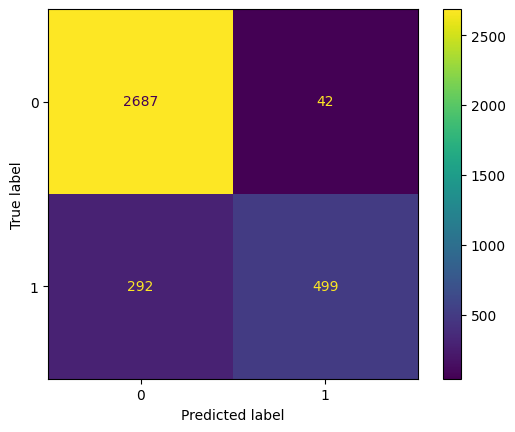

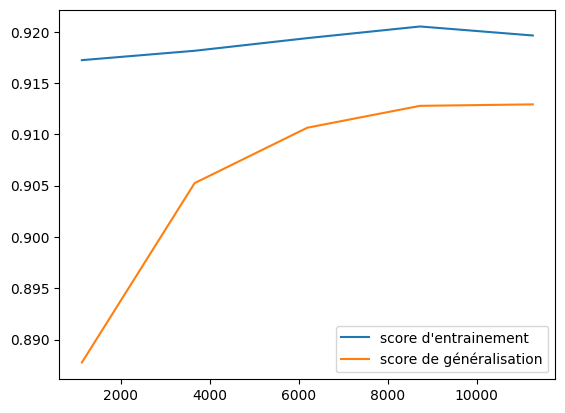

In [ ]:
from sklearn import svm
svmc= svm.SVC()
svmc.fit(x_train, y_train)
preds = svmc.predict(x_test)


from sklearn.metrics import ConfusionMatrixDisplay
cm_display = ConfusionMatrixDisplay(confusion_matrix(y_test,preds)).plot()

print(classification_report(y_test,preds))
N, train_score, val_score = learning_curve(svmc, x_train, y_train)
plt.figure()
plt.plot(N, train_score.mean(axis=1), label = "score d'entrainement")
plt.plot(N, val_score.mean(axis=1), label = "score de généralisation")
plt.legend()

# III-OPTIMISATION DES MODELES

#1- svm

In [ ]:
# Defining 3-dimensional hyperparameter space as a Python dictionary
from sklearn import svm
from sklearn.model_selection import GridSearchCV

svm = svm.SVC()

hyperparameter_space = param_grid = {
    'C': [11,10,9],  # Paramètre de régularisation
    'kernel': [ 'rbf'],  # Noyau utilisé pour la fonction de décision
    'gamma': ['scale', 'auto']  # Coefficient du noyau pour 'rbf'
}

svmop= GridSearchCV(svm, param_grid=hyperparameter_space,scoring="accuracy",n_jobs=-1, cv=10, return_train_score=True)

svmop.fit(x_train, y_train)
print("Optimal hyperparameter combination:", svmop.best_params_)
print()
print("Mean cross-validated training accuracy score:", svmop.best_score_)
svmop.best_estimator_.fit(x_train, y_train)
y_pred = svmop.best_estimator_.predict(x_test) # Predictions
y_true = y_test # True values


In [ ]:
print(" les metriques pour  random SVM optimisee  est de :")
print( classification_report(y_true,y_pred))

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
print("matrice de confusion avec le svm optimise:")
cm = confusion_matrix(y_test, y_pred)

cm_display = ConfusionMatrixDisplay(cm).plot()

# 3- REGRESSION LOGISTIQUE

In [ ]:
from sklearn.linear_model import LogisticRegression



In [ ]:
# Defining 3-dimensional hyperparameter space as a Python dictionary
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

model_lg = LogisticRegression()

hyperparameter_space = {
    'penalty': ['l1', 'l2'],  # Type de pénalité (l1 ou l2)
    'C': [3,5,10],  # Inverse de la force de régularisation
    'solver': ['liblinear', 'lbfgs', 'saga']  # Algorithme de résolution
}

model_lg= GridSearchCV(model_lg, param_grid=hyperparameter_space,scoring="accuracy",n_jobs=-1, cv=10, return_train_score=True)

model_lg.fit(x_train, y_train)
print("Optimal hyperparameter combination:", model_lg.best_params_)
print()
print("Mean cross-validated training accuracy score:", model_lg.best_score_)
model_lg.best_estimator_.fit(x_train, y_train)
y_pred = model_lg.best_estimator_.predict(x_test) # Predictions
y_true = y_test # True values

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
30 fits failed out of a total of 180.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 54, in _check_solver
    raise ValueError(
ValueError: Solv

Optimal hyperparameter combination: {'C': 3, 'penalty': 'l1', 'solver': 'saga'}

Mean cross-validated training accuracy score: 0.8383974781868639


In [ ]:
print(" les metriques pour  la regression logistique optimisee  est de :")
print( classification_report(y_true,y_pred))

 les metriques pour  la regression logistique optimisee  est de :
              precision    recall  f1-score   support

           0       0.85      0.95      0.90      5072
           1       0.70      0.39      0.50      1445

    accuracy                           0.83      6517
   macro avg       0.77      0.67      0.70      6517
weighted avg       0.81      0.83      0.81      6517



matrice de confusion avec le regression logistique optimisee:


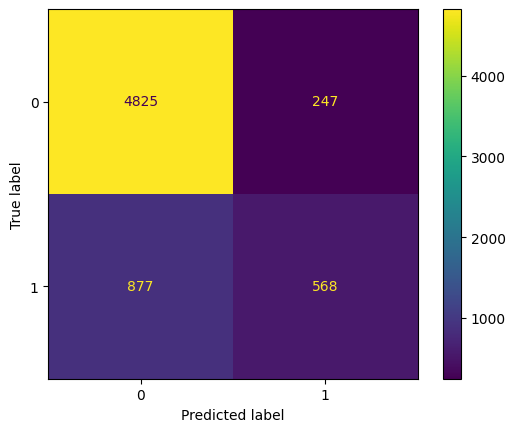

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
print("matrice de confusion avec le regression logistique optimisee:")
cm = confusion_matrix(y_test, y_pred)

cm_display = ConfusionMatrixDisplay(cm).plot()

# 4-RANDOM FOREST

In [ ]:
param_grid = {
    'n_estimators': [8,16,20,30],  # Nombre d'arbres dans la forêt
    'max_depth': [None, 5, 10],  # Profondeur maximale de chaque arbre
    'min_samples_split': [2, 5, 10],  # Nombre minimum d'échantillons requis pour diviser un nœud
    'min_samples_leaf': [1, 2, 4]  # Nombre minimum d'échantillons requis dans une feuille
}


In [ ]:
rf = RandomForestClassifier()


In [ ]:
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5)
grid_search.fit(x_train, y_train)  # X_train et y_train représentent vos données d'entraînement


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [None, 5, 10],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [8, 16, 20, 30]})

In [ ]:
best_params = grid_search.best_params_
best_score = grid_search.best_score_

In [ ]:
best_rf = RandomForestClassifier(**best_params)
best_rf.fit(x_train, y_train)
y_pred = best_rf.predict(x_test) # Predictions
y_true = y_test # True values


In [ ]:
print(" les metriques pour  la regression random forest optimisee  sont :")
print( classification_report(y_true,y_pred))

 les metriques pour  la regression random forest optimisee  sont :
              precision    recall  f1-score   support

           0       0.91      0.98      0.94      5072
           1       0.91      0.66      0.77      1445

    accuracy                           0.91      6517
   macro avg       0.91      0.82      0.86      6517
weighted avg       0.91      0.91      0.91      6517



matrice de confusion avec random forest optimisee:
 les metriques pour  RandomForest optimisee  est de :
              precision    recall  f1-score   support

           0       0.91      0.98      0.94      5072
           1       0.91      0.66      0.77      1445

    accuracy                           0.91      6517
   macro avg       0.91      0.82      0.86      6517
weighted avg       0.91      0.91      0.91      6517



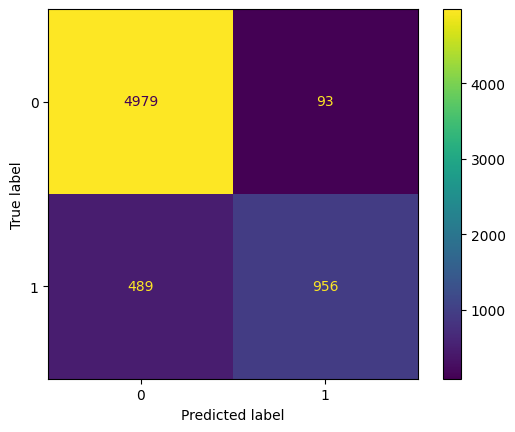

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
print("matrice de confusion avec random forest optimisee:")
cm = confusion_matrix(y_true, y_pred)

cm_display = ConfusionMatrixDisplay(cm).plot()

print(" les metriques pour  RandomForest optimisee  est de :")
print( classification_report(y_true,y_pred))

# 5- XGBOOST

In [ ]:
hyperparameter_space ={'nthread':[4], #when use hyperthread, xgboost may become slower
              'objective':['binary:logistic'],
              'learning_rate': [0.15,0.1,0.2], #so called `eta` value
              'max_depth': [11,12,10],
              'min_child_weight': [10,11,12],
              'subsample': [0.7,0.8,0.9],
              'colsample_bytree': [0.7,0.8,0.6],
              'n_estimators': [5,100,20,1000], #number of trees, change it to 1000 for better results
              'missing':[-999],
              'seed': [1337]}

from xgboost import XGBClassifier
model_XG=XGBClassifier()
clf = GridSearchCV(model_XG, hyperparameter_space, n_jobs=5, cv=2,  scoring='roc_auc', verbose=1, refit=True)
clf.fit(x_train, y_train)
print("Optimal hyperparameter combination:", clf.best_params_)
print()
print("Mean cross-validated training accuracy score:", clf.best_score_)
clf.best_estimator_.fit(x_train, y_train)
y_pred = clf.best_estimator_.predict(x_test) # Predictions
y_true = y_test # True values


Fitting 2 folds for each of 972 candidates, totalling 1944 fits


In [ ]:
print(" les metriques pour  xgboost optimisee  est de :")
print( classification_report(y_true,y_pred))

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
print("matrice de confusion avec xgboost optimisee:")
cm = confusion_matrix(y_test, y_pred)

cm_display = ConfusionMatrixDisplay(cm).plot()

# IV- intepretation des modeles

In [ ]:
pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 572.6/572.6 kB 14.8 MB/s eta 0:00:00


In [ ]:
#importation de shap
import shap




# 1-ARBRE DE DECISION

## a-shap

In [ ]:
# Initialisation de l'explainer SHAP
explainer = shap.Explainer(model)
# Calcul des valeurs SHAP pour les données de test
shap_values = explainer.shap_values(x_test)

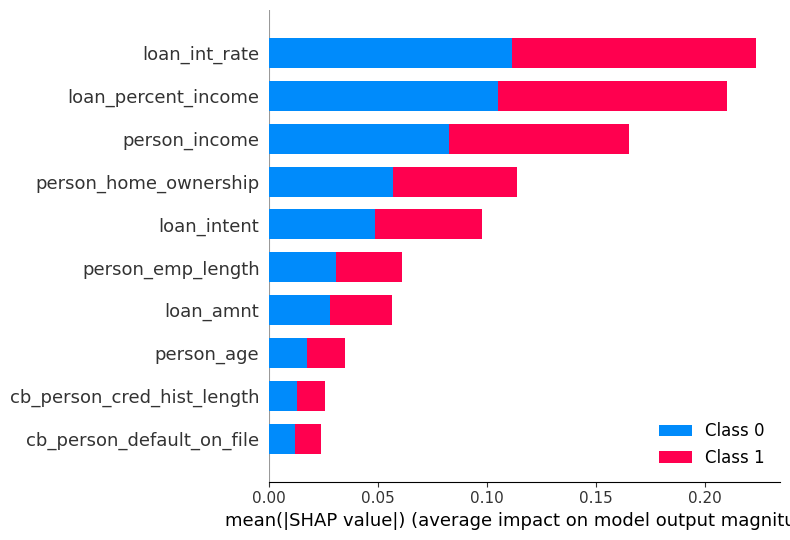

In [ ]:
shap.summary_plot(shap_values, x_test)

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


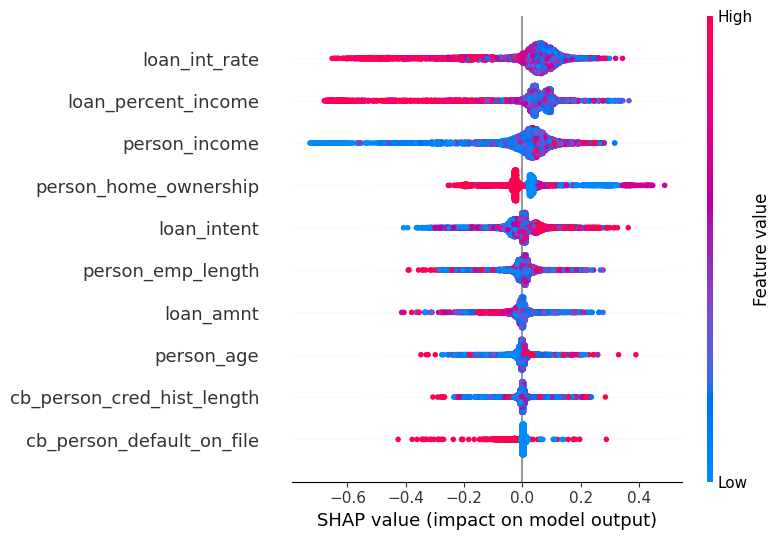

In [ ]:
shap.summary_plot(shap_values[0], x_test)

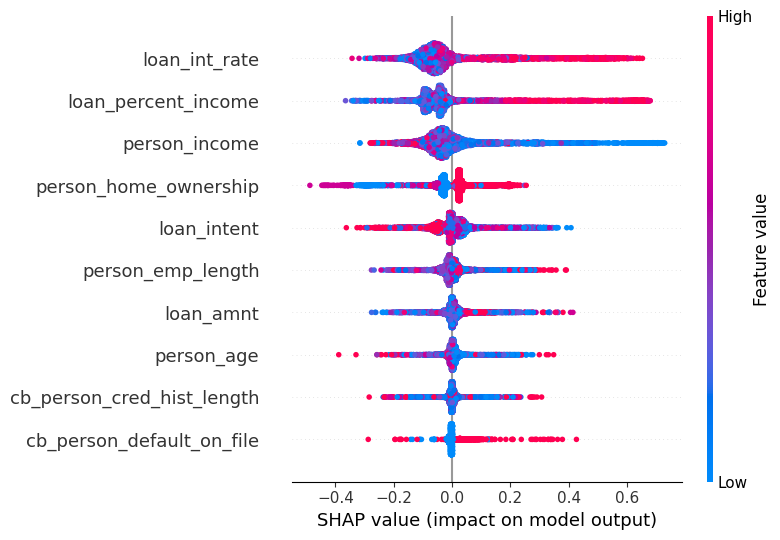

In [ ]:
shap.summary_plot(shap_values[1], x_test)

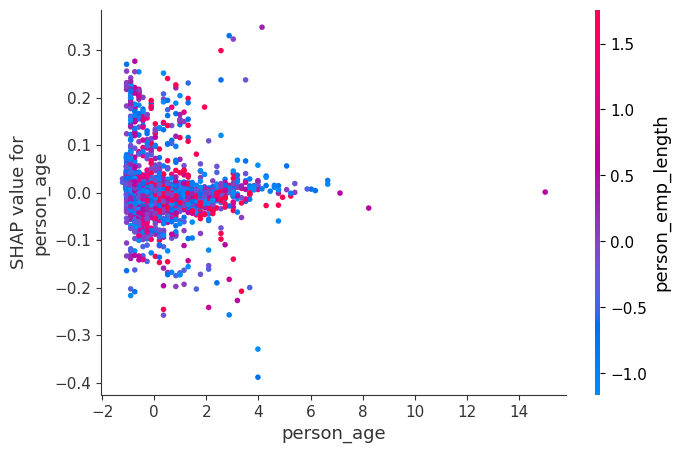

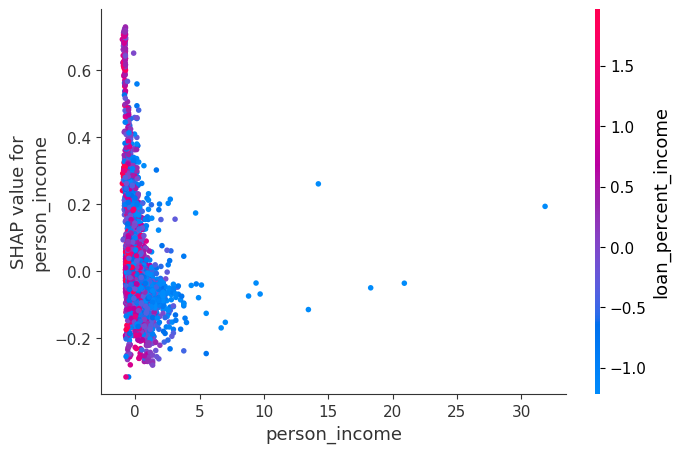

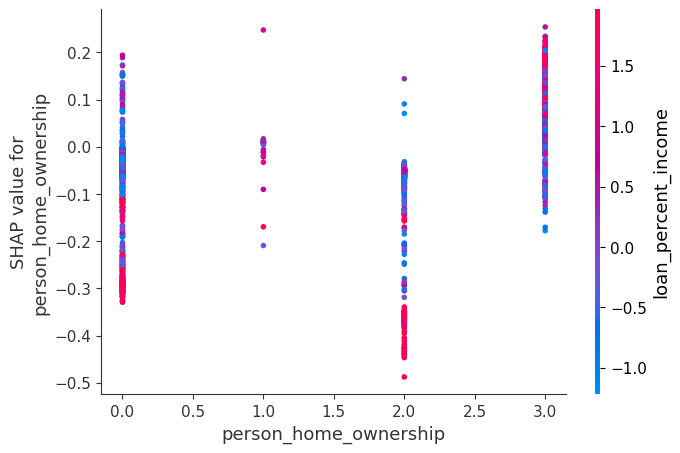

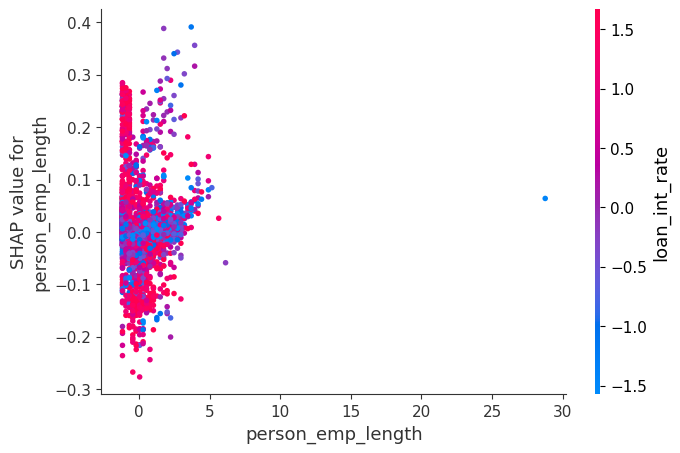

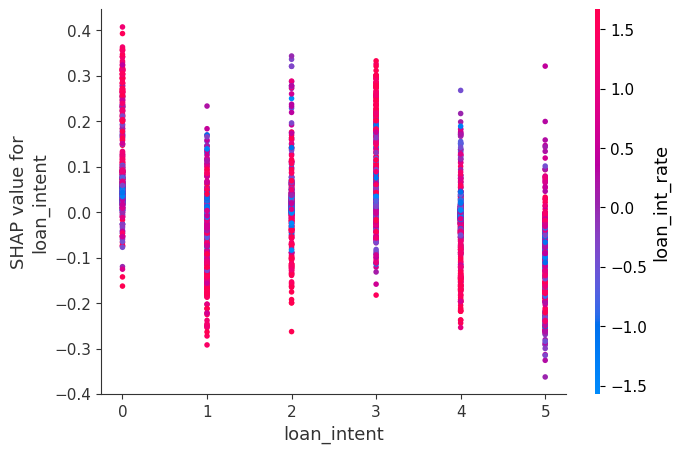

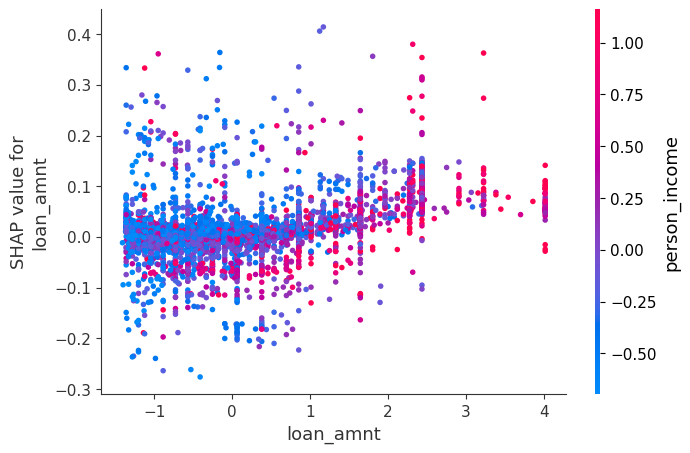

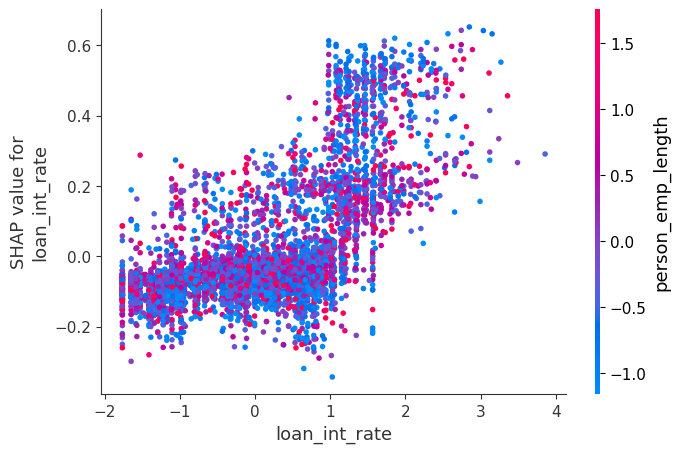

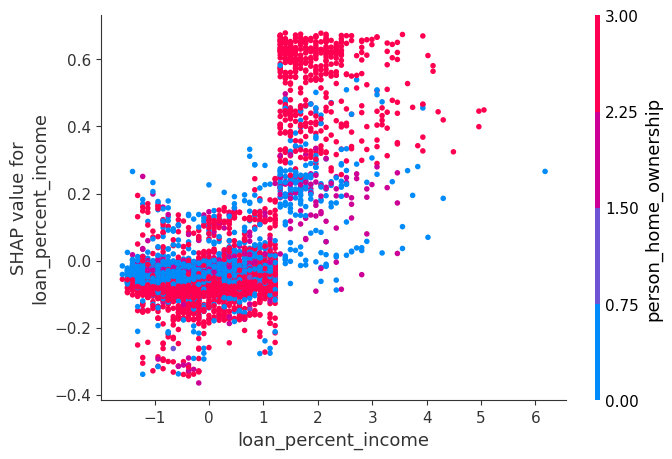

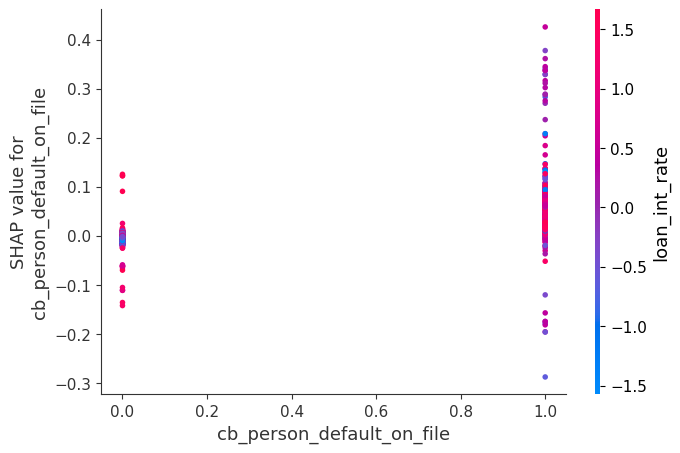

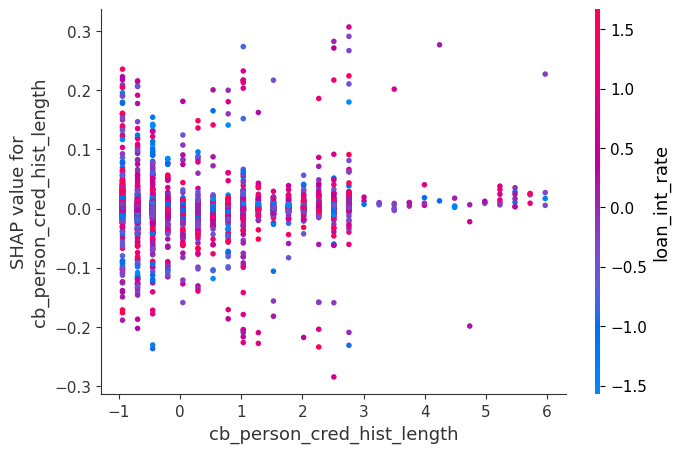

In [ ]:
#pour la classe non rembourse
for i in df1.columns:
  shap.dependence_plot(i, shap_values[1], x_test)

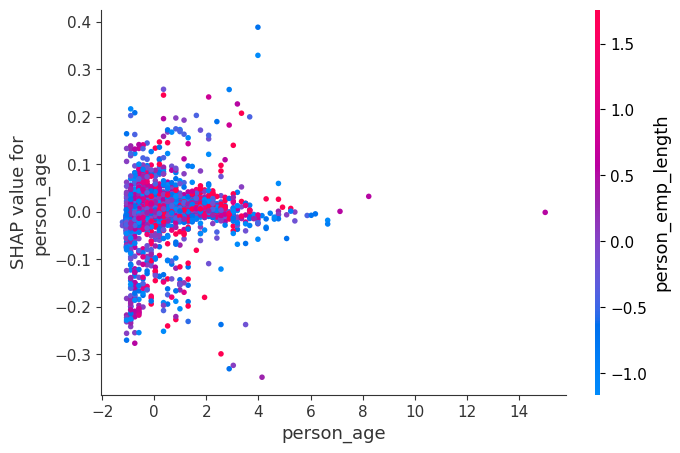

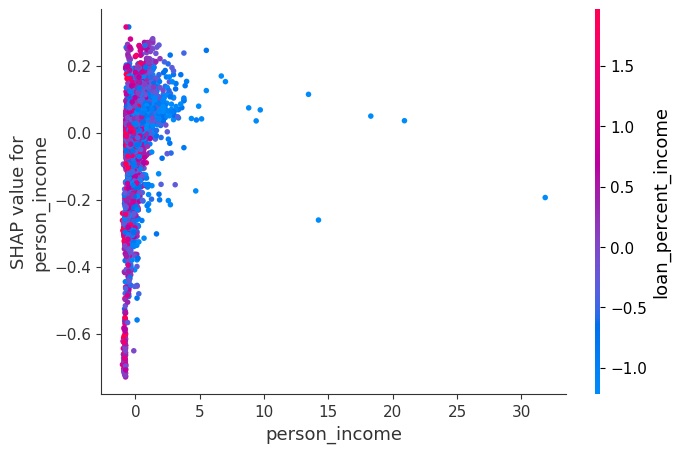

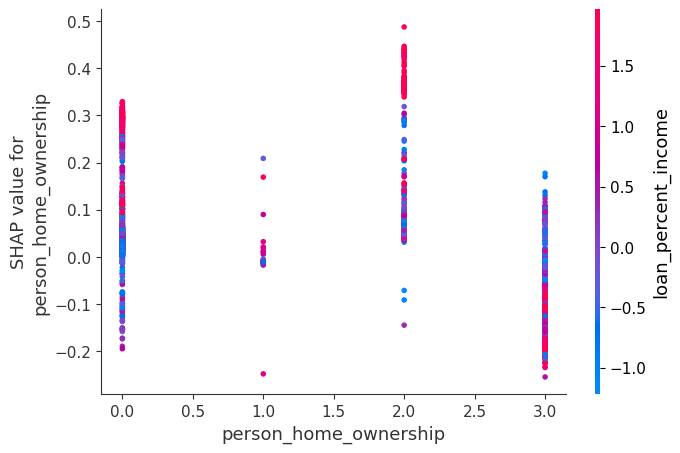

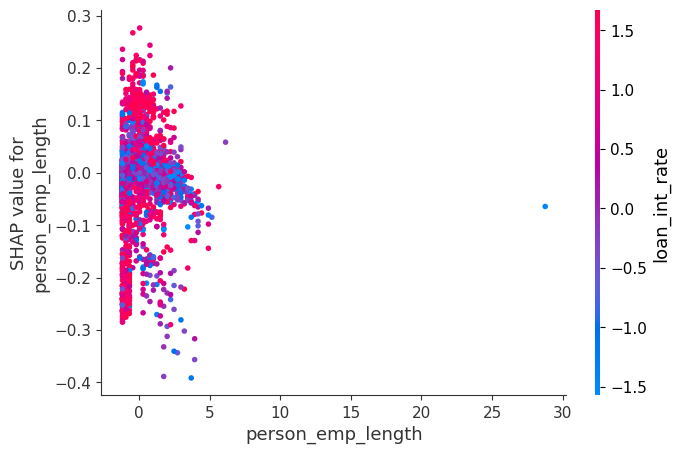

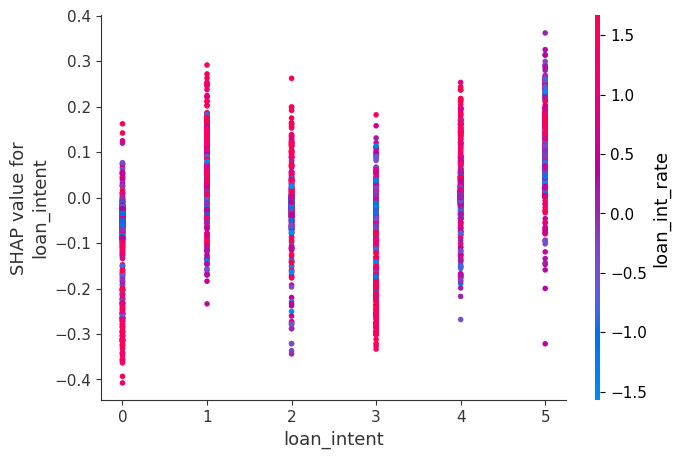

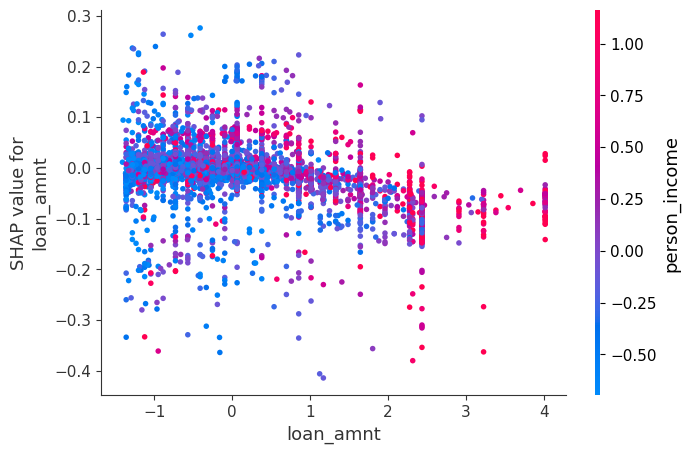

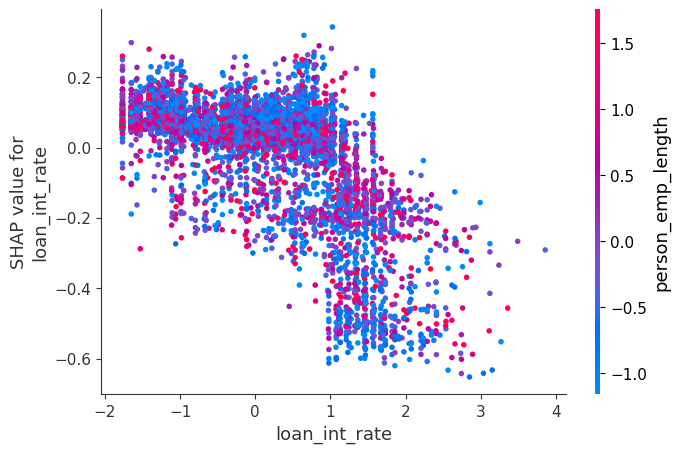

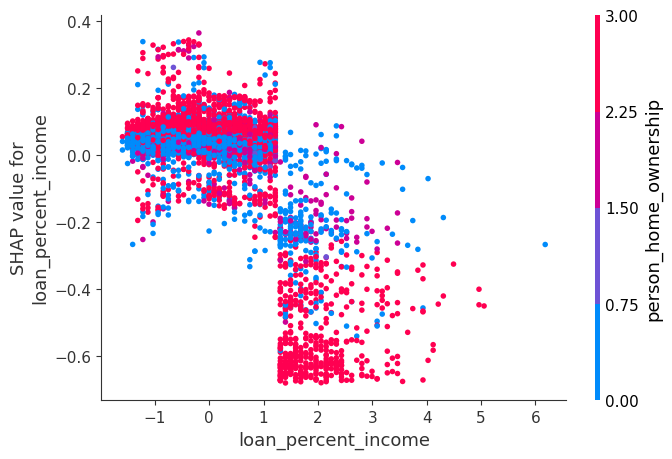

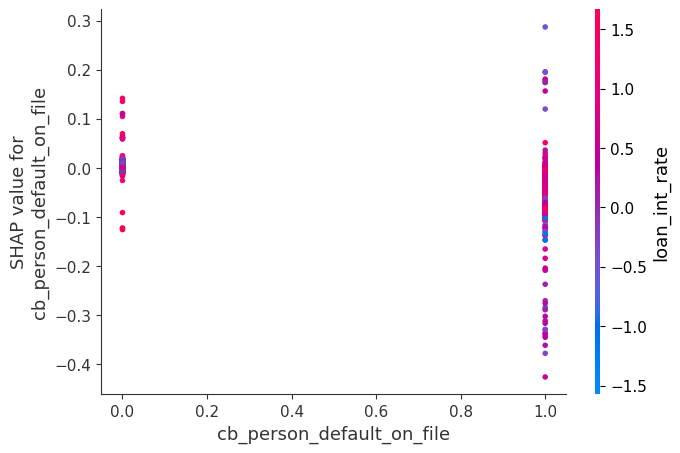

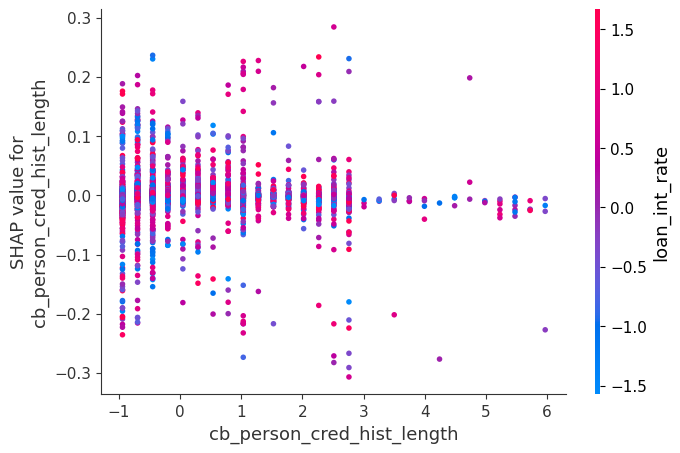

In [ ]:
#poir la classe rembourse
for i in df1.columns:
  shap.dependence_plot(i, shap_values[0], x_test)

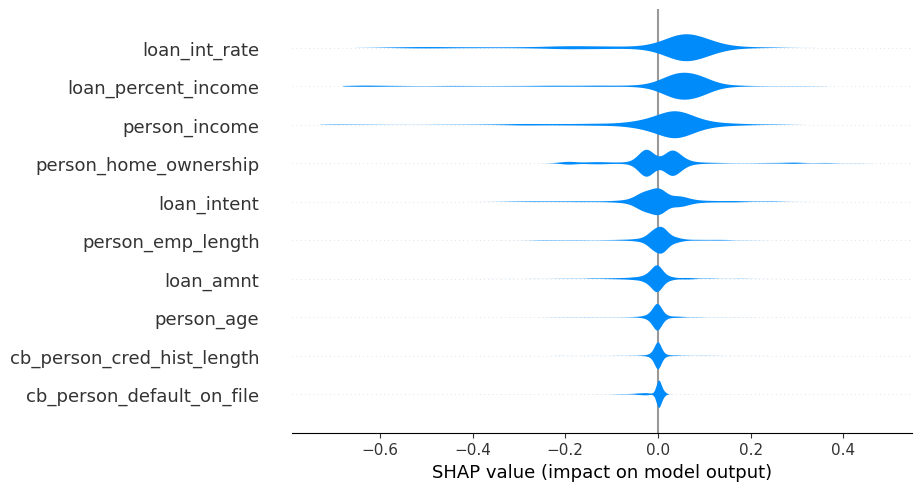

In [ ]:
#pour la classe rembourse
shap.plots.violin(shap_values[0],feature_names, show=True)


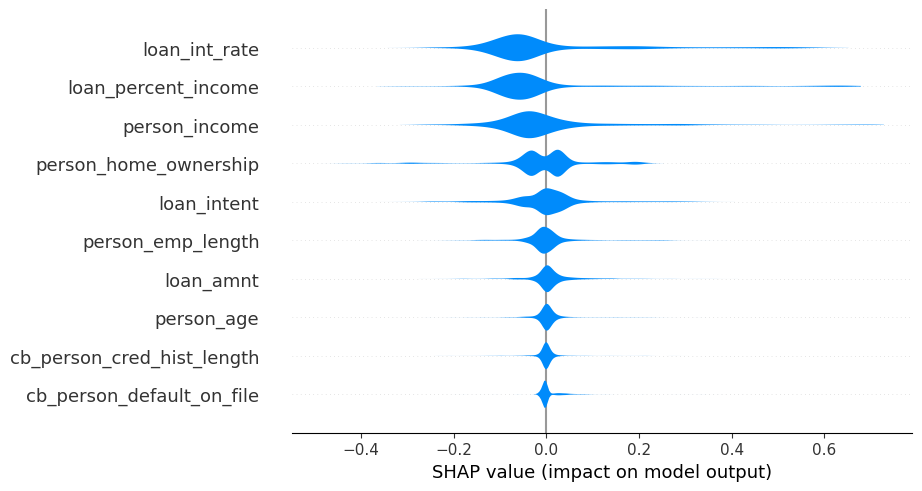

In [ ]:
#pour la classe non rembourse
shap.plots.violin(shap_values[1],feature_names, show=True)

# b-lime

In [ ]:
pip install lime

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 9.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283839 sha256=7d355cc31d2c1932a4e3511363167d8cf9917ceb018332bdfafc80992faac928
  Stored in directory: /root/.cache/pip/wheels/fd/a2/af/9ac0a1a85a27f314a06b39e1f492bee1547d52549a4606ed89
Successfully built lime


In [ ]:
import lime
from lime import lime_tabular

explainer = lime_tabular.LimeTabularExplainer(
    training_data=np.array(x_train),
    feature_names=x_train.columns,
    class_names=['non rembourse', 'rembourse'],
    mode='classification'
)

In [ ]:
exp = explainer.explain_instance(
    data_row=x_test.iloc[1],
    predict_fn=model.predict_proba
)

exp.show_in_notebook(show_table=True)

X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names


In [ ]:
exp = explainer.explain_instance(
    data_row=x_test.iloc[4],
    predict_fn=model.predict_proba
)

exp.show_in_notebook(show_table=True)

X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names


c-eli5

In [ ]:
pip install eli5

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.2/216.2 kB 8.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for eli5: filename=eli5-0.13.0-py2.py3-none-any.whl size=107730 sha256=d2b38a45a9328af4b0e46a48edffb35a04c0655f4a0961fe4a6bf127c60a7a4a
  Stored in directory: /root/.cache/pip/wheels/b8/58/ef/2cf4c306898c2338d51540e0922c8e0d6028e07007085c0004
Successfully built eli5


In [ ]:
import eli5
from eli5.sklearn import PermutationImportance

In [ ]:
# Calcul de l'importance des caractéristiques avec PermutationImportance
perm = PermutationImportance(model).fit(x_test, y_test)


In [ ]:
# Affichage de l'importance des caractéristiques avec eli5
eli5.show_weights(perm, feature_names=feature_names)


#2- SVM

In [ ]:
import shap
from sklearn import svm



# Entraîner le modèle SVM
# model = svm.SVC(kernel='rbf', probability=True)
# model.fit(x_train, y_train)

# Créer un explainer SHAP
explainer = shap.KernelExplainer(model.predict_proba, x_test[1:30])

# Calculer les valeurs SHAP pour un exemple spécifique
sample_idx = 0
shap_values = explainer.shap_values(x_test[sample_idx:sample_idx+1])

# Afficher les contributions SHAP
shap.initjs()



X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names


  0%|          | 0/1 [00:00<?, ?it/s]

X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names


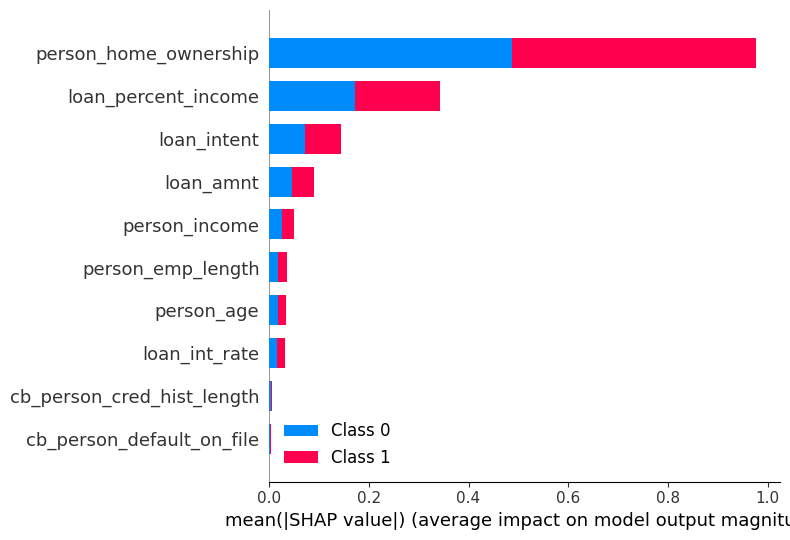

In [ ]:

# Affichage des valeurs SHAP pour les premières observations
shap.summary_plot(shap_values, x_test)

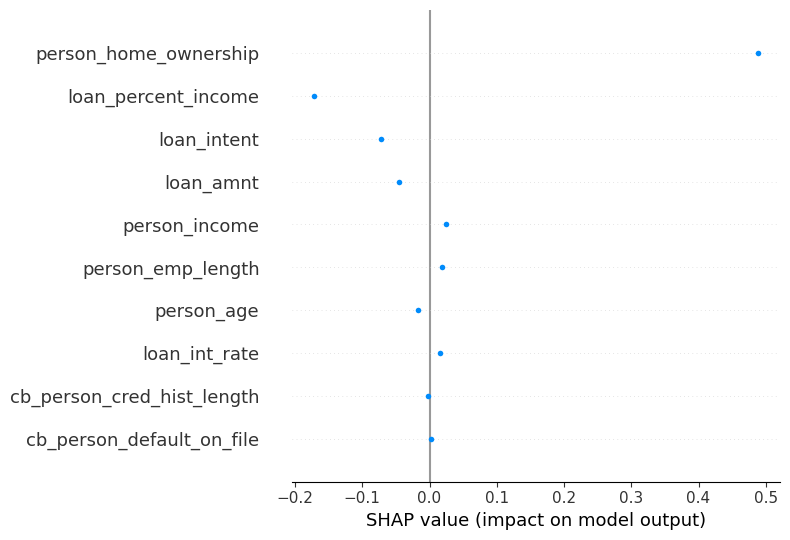

In [ ]:

shap.summary_plot(shap_values[0],feature_names)

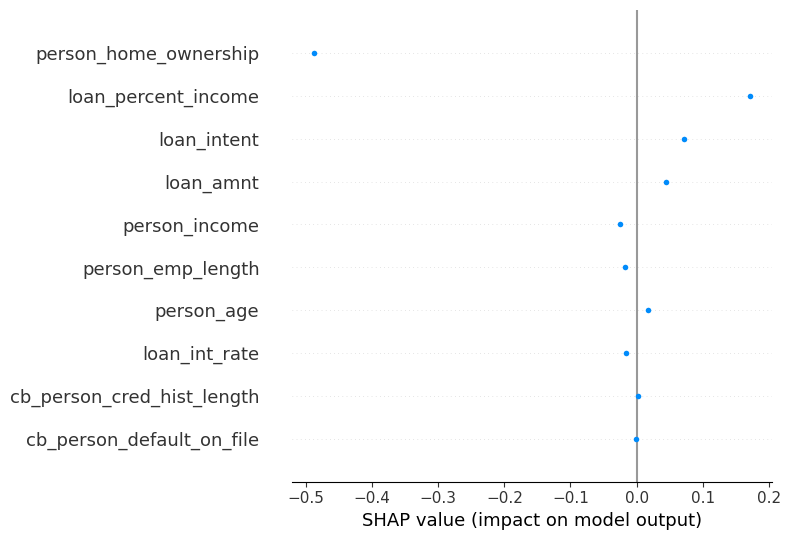

In [ ]:

# Affichage des valeurs SHAP pour les premières observations
shap.summary_plot(shap_values[1], feature_names)

In [ ]:
# Calcul de l'importance des caractéristiques avec PermutationImportance
perm = PermutationImportance(svmc).fit(x_test, y_test)


In [ ]:
# Affichage de l'importance des caractéristiques avec eli5
eli5.show_weights(perm, feature_names=feature_names)


In [ ]:
#diagramme force empile
shap.plots.initjs()
shap.plots.force(explainer.expected_value[0],shap_values[0],feature_names)

In [ ]:
shap.plots.initjs()
shap.plots.force(explainer.expected_value[1],shap_values[0],feature_names)

In [ ]:
shap.plots.violin(shap_values[1],feature_names, show=True)

In [ ]:
shap.plots.violin(shap_values[0],feature_names, show=True)

# 3-REGRESSION LOGISTIQUE

In [ ]:
shap.initjs()
explainer = shap.KernelExplainer(model_lg.predict, x_test[1:100])
shap_values = explainer.shap_values(x_test[1:100])


In [ ]:
shap.summary_plot(shap_values, x_test[1:100])

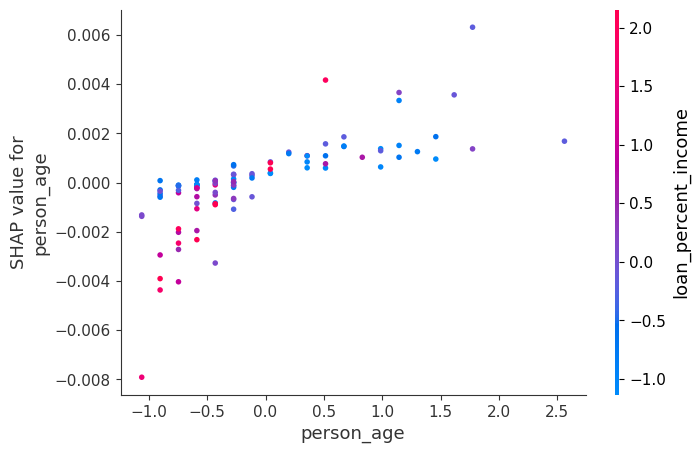

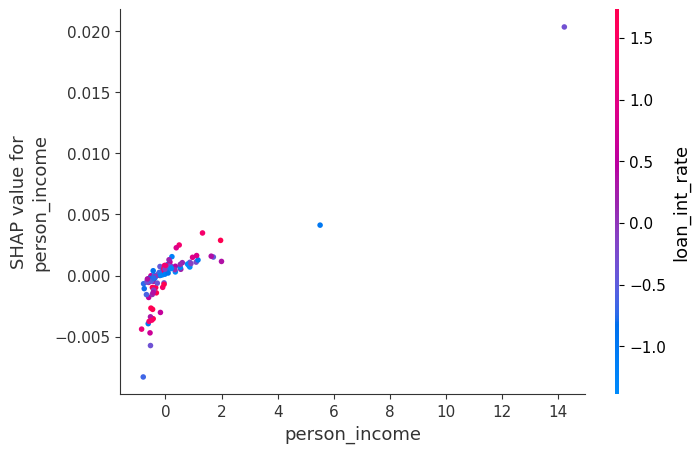

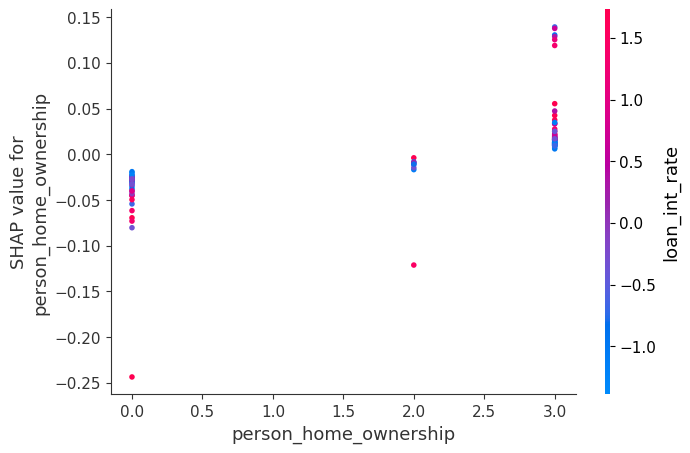

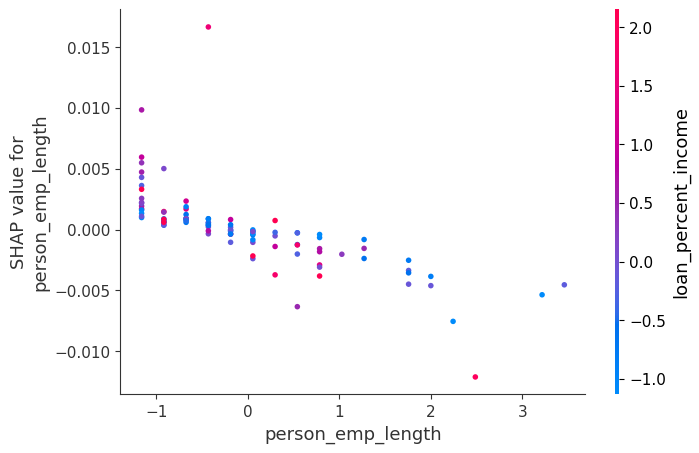

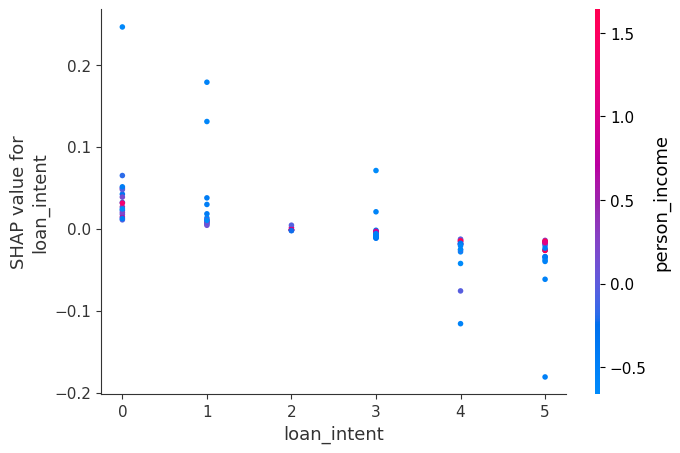

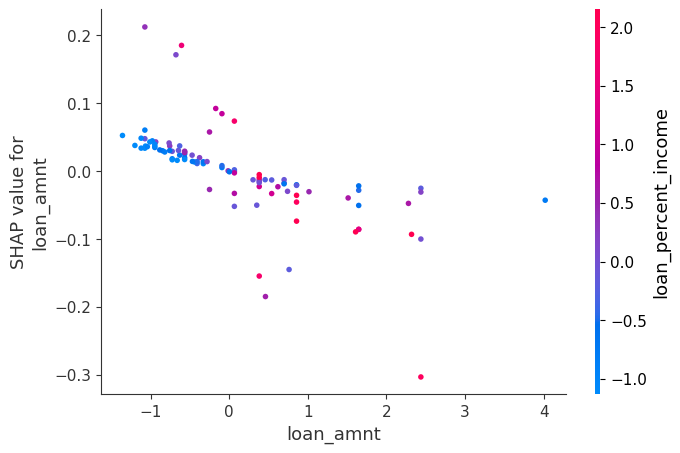

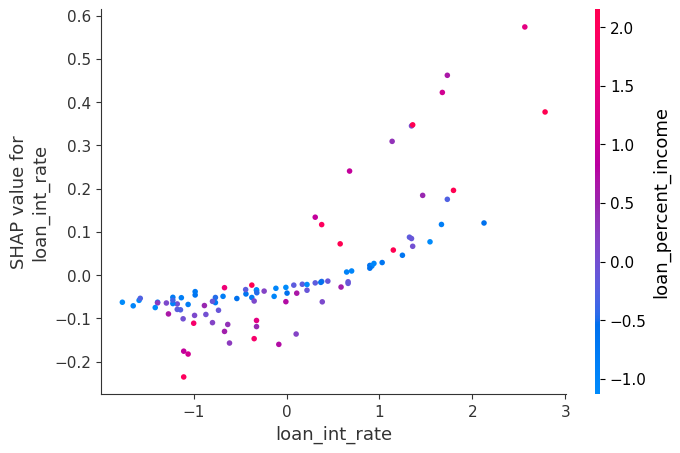

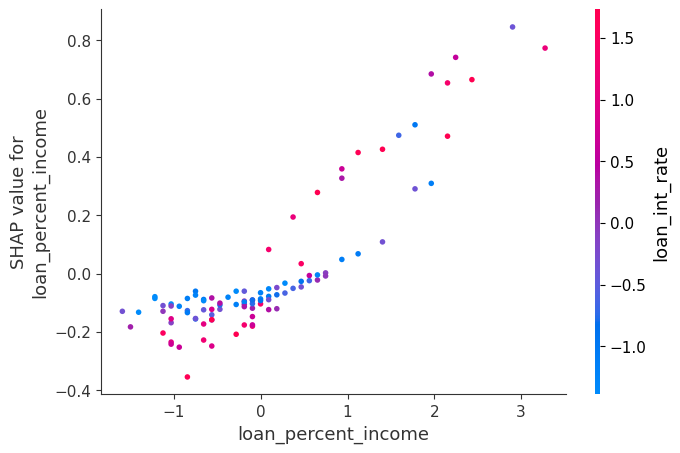

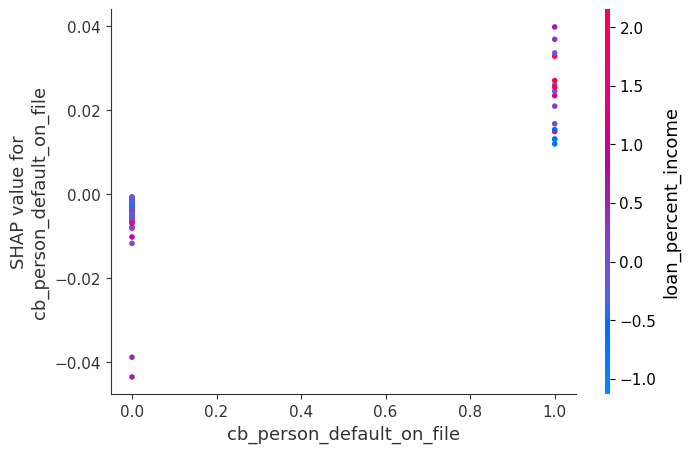

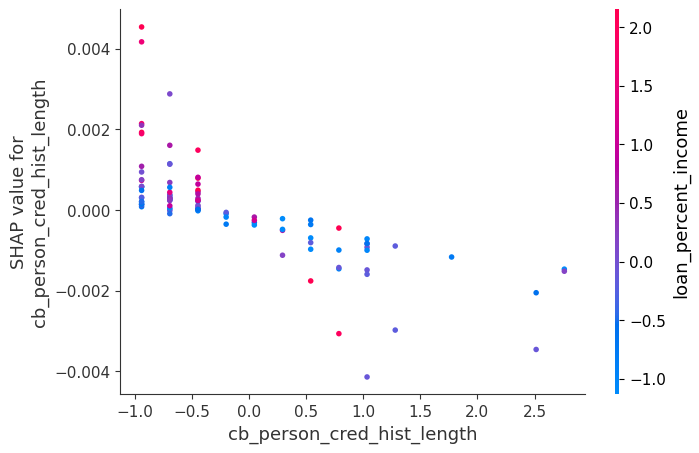

In [ ]:
for i in df1.columns:
  shap.dependence_plot(i, shap_values, x_test[1:100])

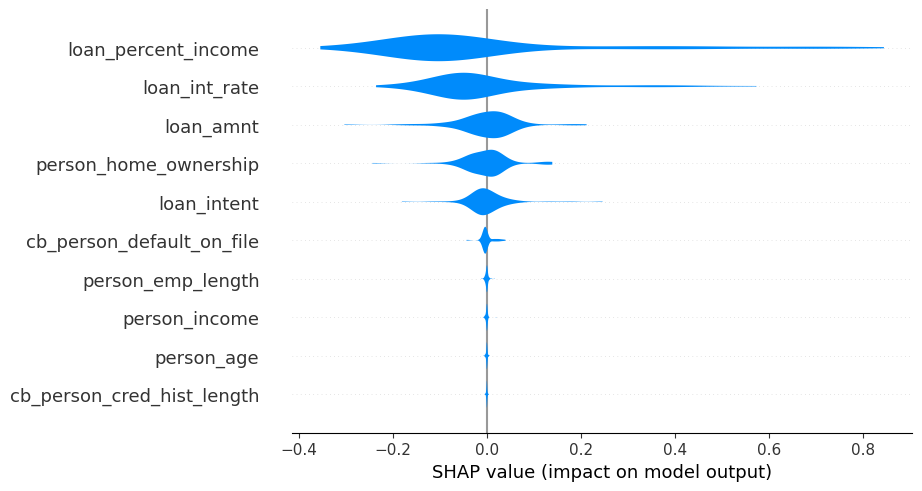

In [ ]:
shap.plots.violin(shap_values,feature_names, show=True)

# 4-RANDOM FOREST

In [ ]:
rf.fit(x_train,y_train)
explainer = shap.KernelExplainer(rf.predict, x_test[1:20],feature_names=df1.columns)
shap_values = explainer.shap_values(x_test[1:20])

X does not have valid feature names, but RandomForestClassifier was fitted with feature names


  0%|          | 0/19 [00:00<?, ?it/s]

X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassif

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


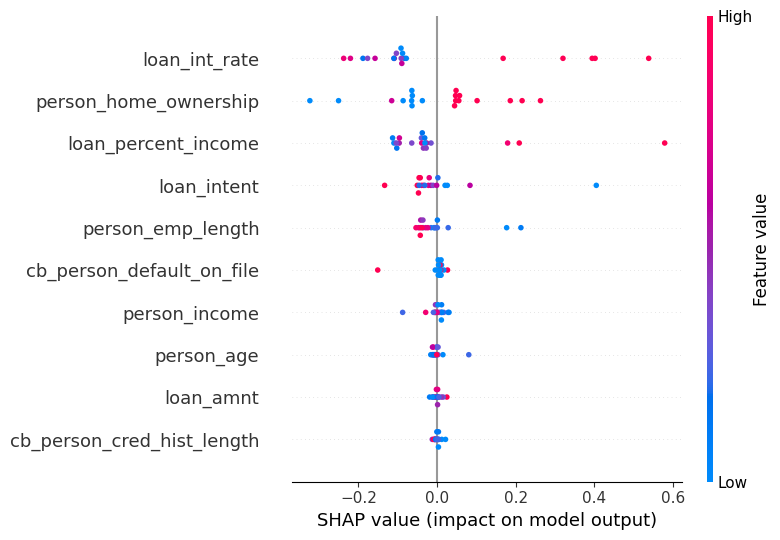

In [ ]:
shap.summary_plot(shap_values, x_test[1:20])

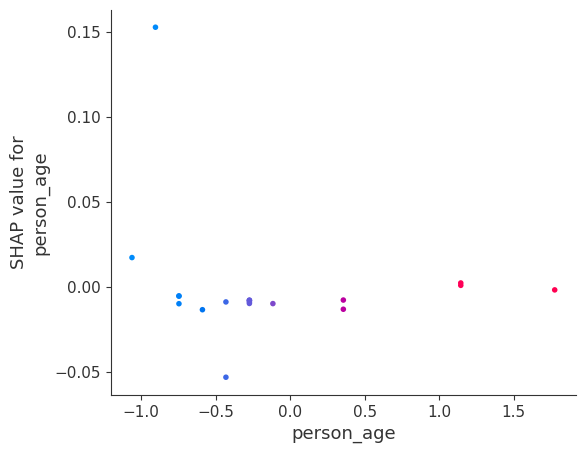

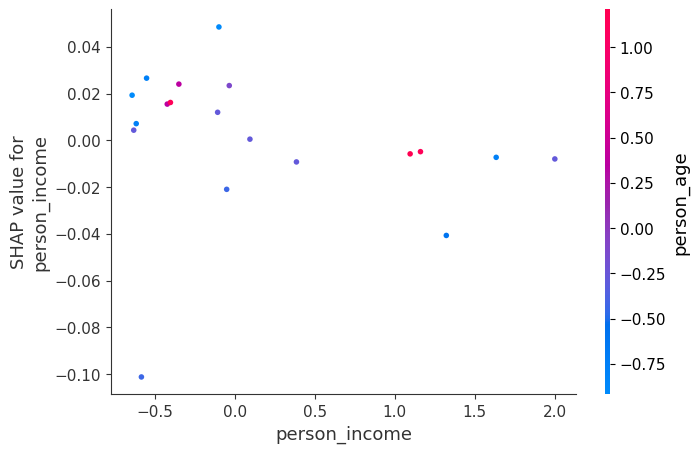

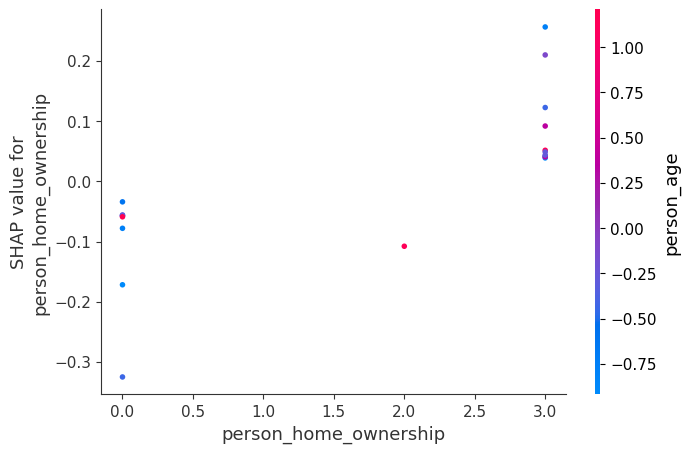

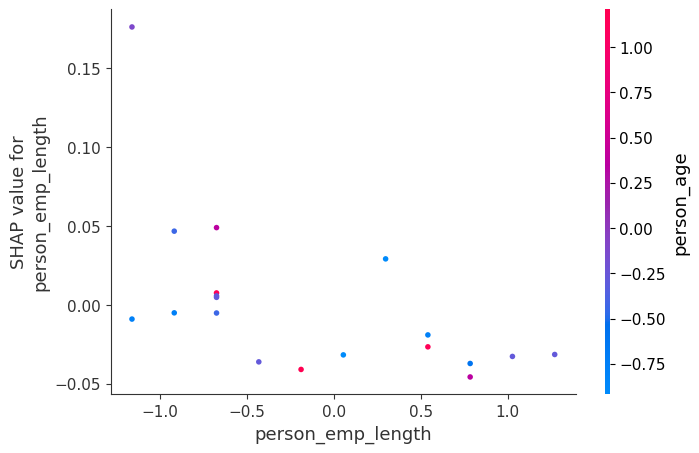

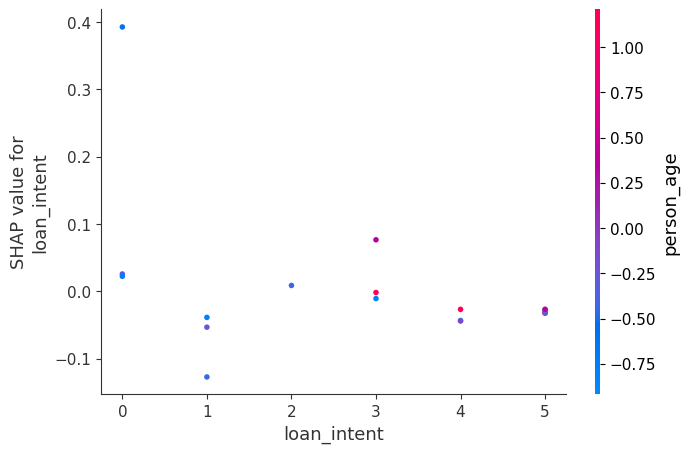

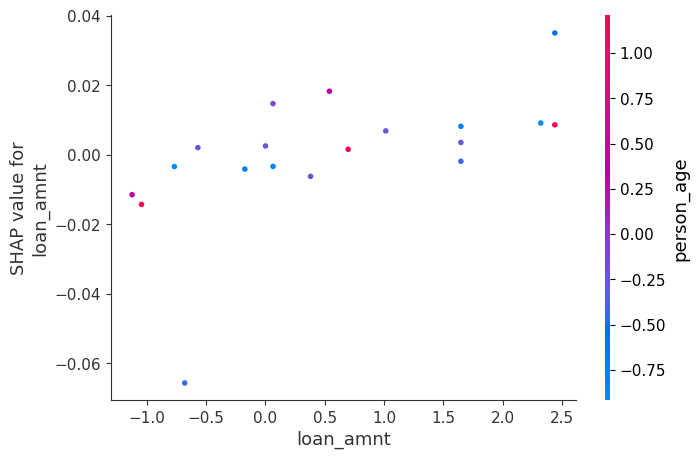

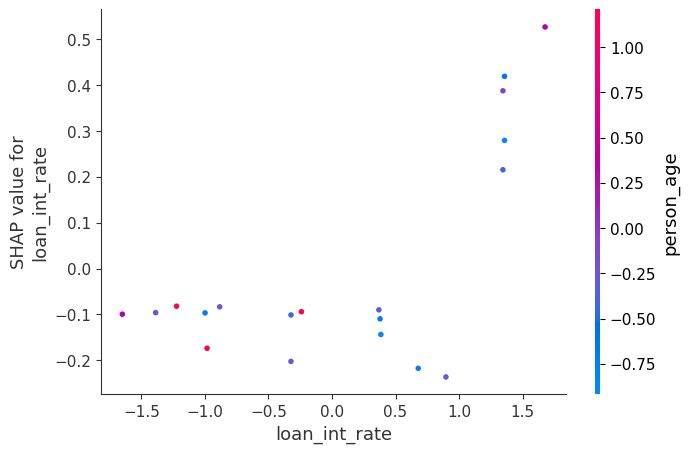

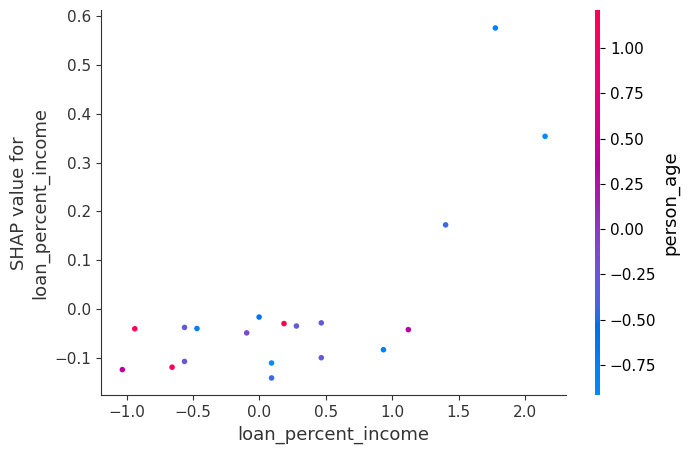

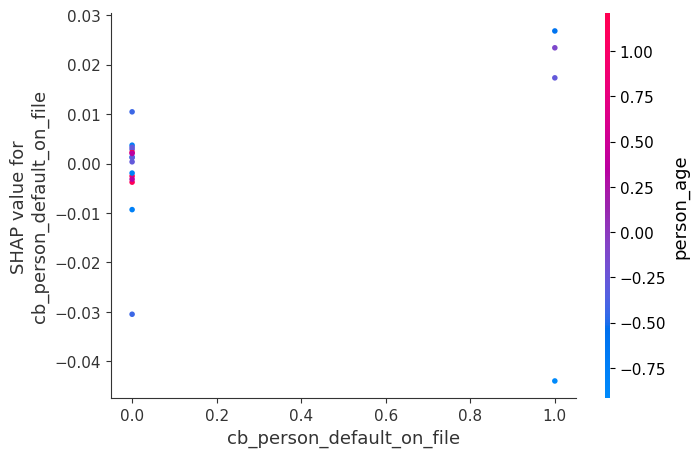

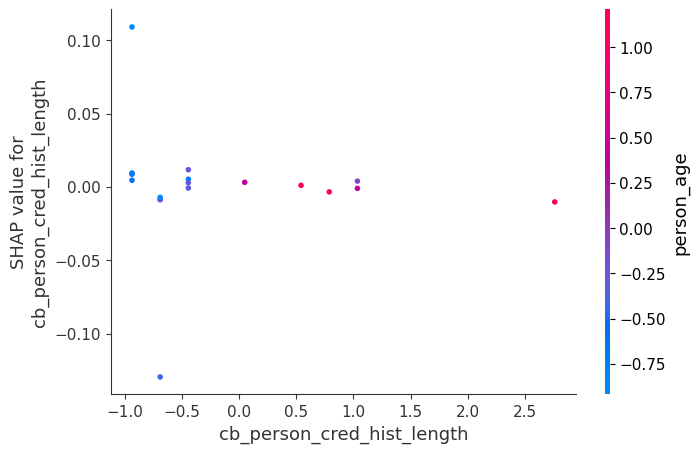

In [ ]:
for i in df1.columns:
  shap.dependence_plot(i, shap_values, x_test[1:20])

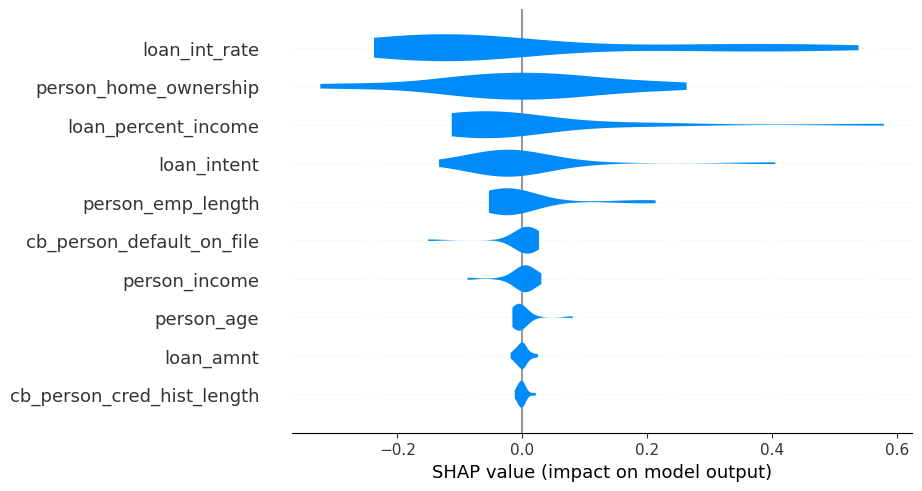

In [ ]:
shap.plots.violin(shap_values,feature_names, show=True)

# 5- XGBOOST

In [ ]:
explainer = shap.TreeExplainer(bst)
#shap_values = explainer(X)
shap_values = explainer.shap_values(x_test)

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


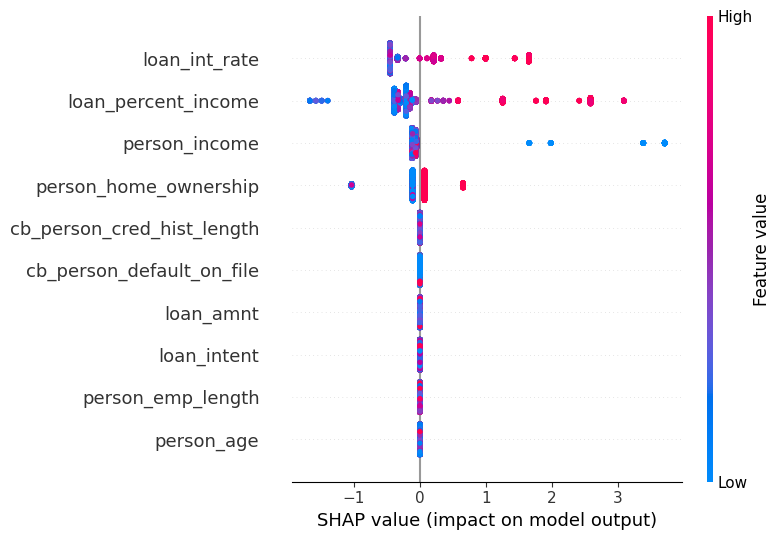

In [ ]:
shap.summary_plot(shap_values, x_test)

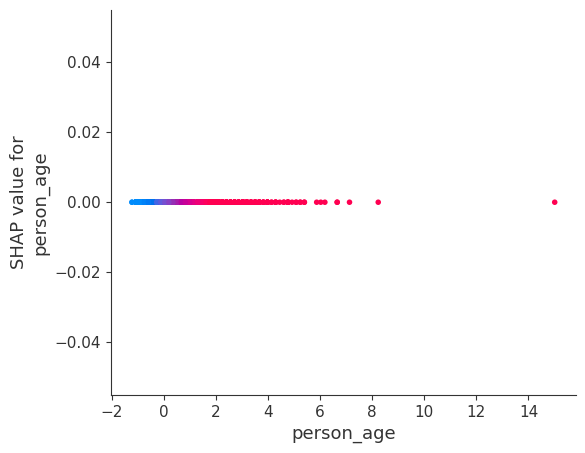

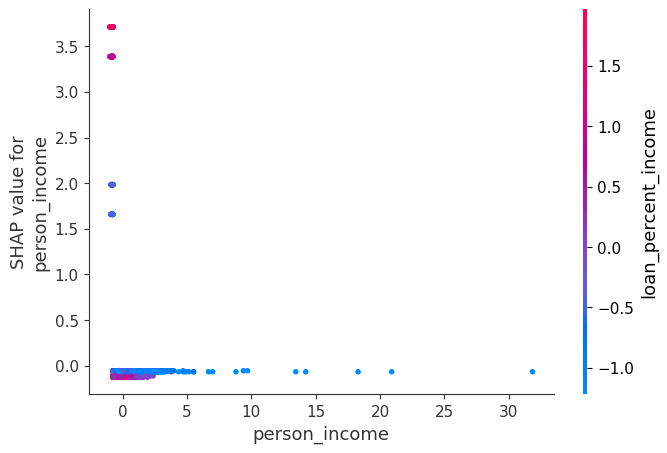

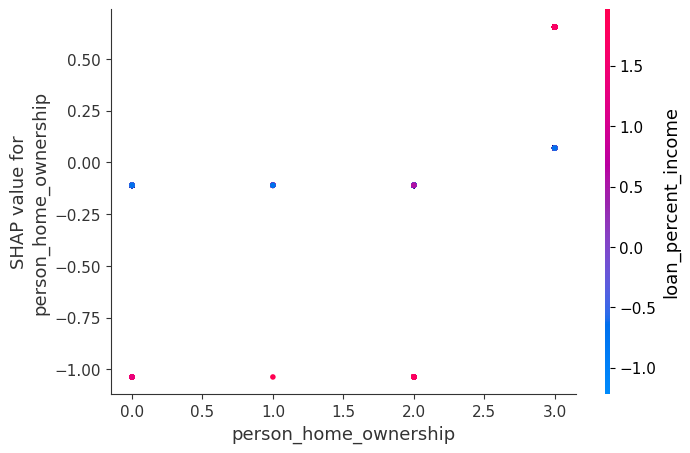

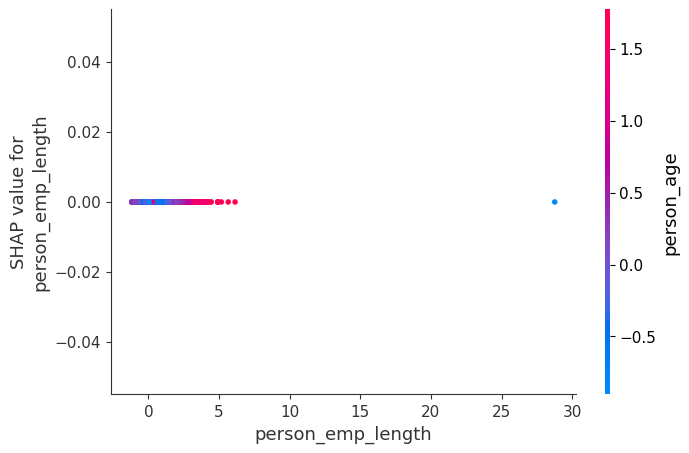

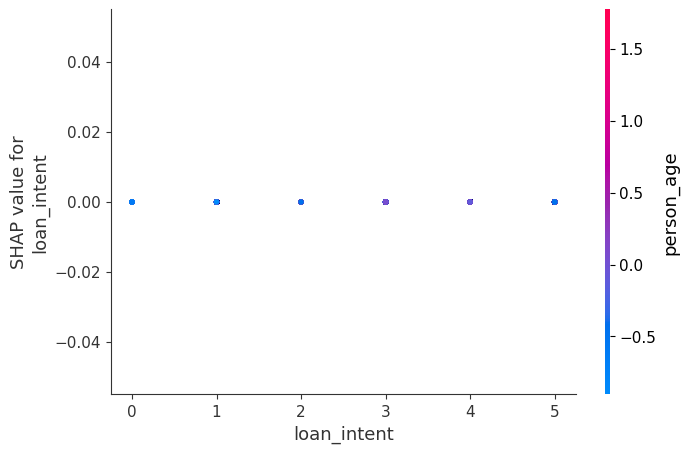

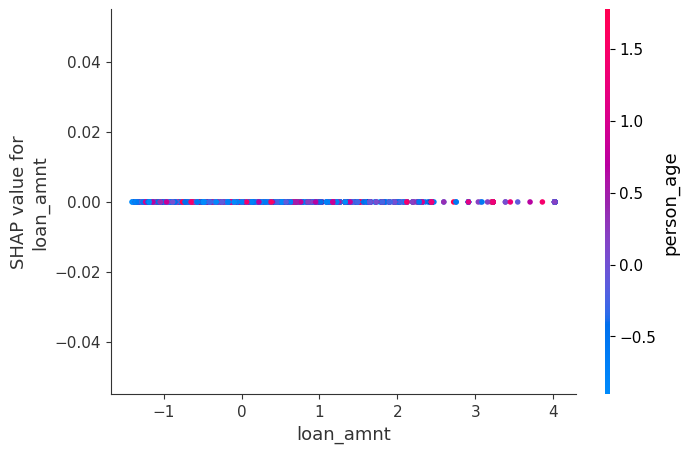

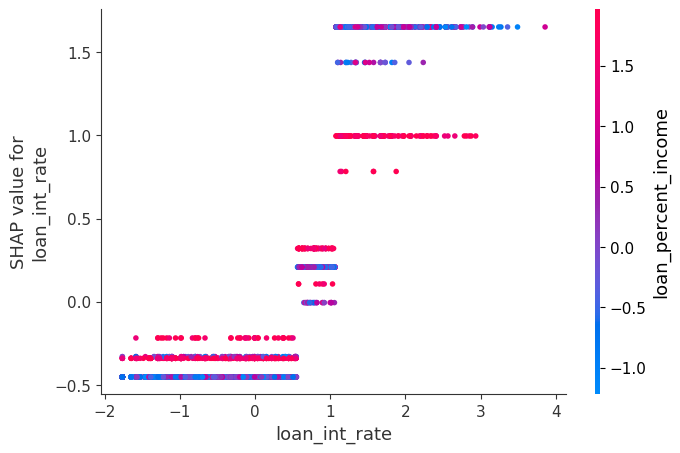

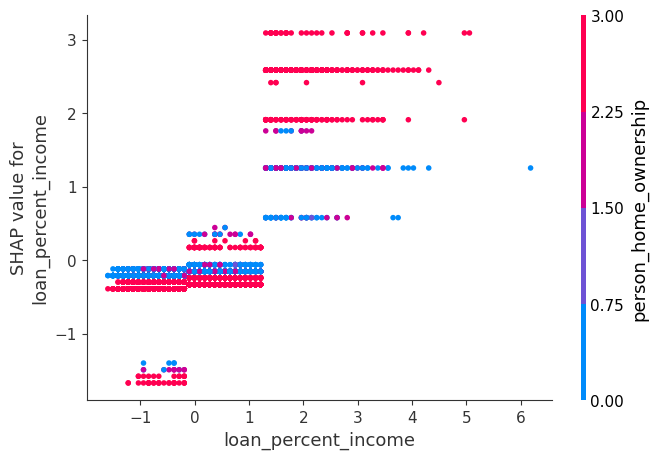

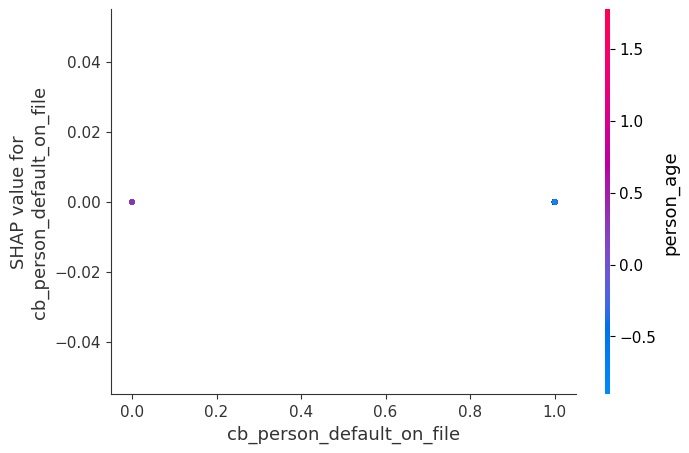

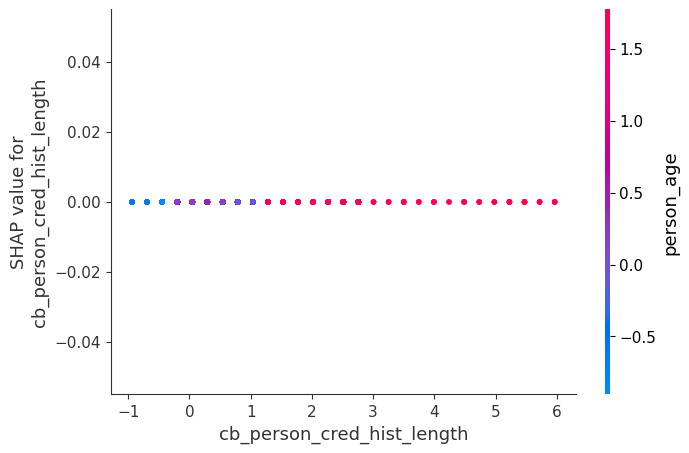

In [ ]:
for i in df1.columns:
  shap.dependence_plot(i, shap_values, x_test)


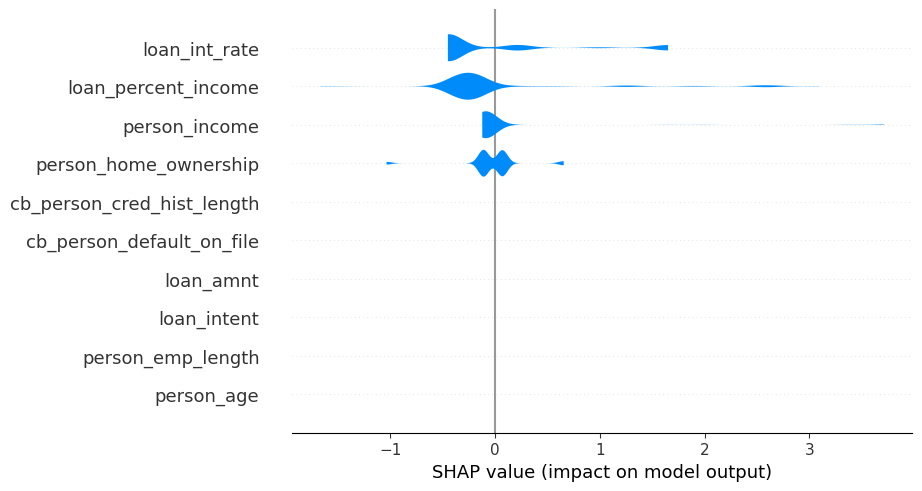

In [ ]:
shap.plots.violin(shap_values,feature_names, show=True)
